# Week 4 Exercise 1

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv("German Credit Data.csv")
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


# Checking for Unique values in All columns

In [3]:
for i in range(len(df.columns)):
    print(f"Unique values in {df.columns[i]}:", df[df.columns[i]].unique())

Unique values in checkin_acc: ['A11' 'A12' 'A14' 'A13']
Unique values in duration: [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
Unique values in credit_history: ['A34' 'A32' 'A33' 'A30' 'A31']
Unique values in amount: [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260  7855  1680  3578  7174  2132  4281  2366  1835  

# Mapping Values

In [4]:
checkin_acc_map = {'A11':  0, 'A12':  1, 'A14':  2, 'A13': 3}
credit_hist_map = {'A34':  0, 'A32':  1, 'A33':  2, 'A30': 3, 'A31': 4}
savings_acc_map = {'A65':  0, 'A61':  1, 'A63':  2, 'A64': 3, 'A62': 4}
present_emp_map = {'A75':  0, 'A73':  1, 'A74':  2, 'A71': 3, 'A72': 4}
person_stat_map = {'A93':  0, 'A92':  1, 'A91':  2, 'A94': 3}
inst_plans_map  = {'A143': 0, 'A141': 1, 'A142': 2}
jobs_map        = {'A173': 0, 'A172': 1, 'A174': 2,'A171': 3}


df["checkin_acc"] = df["checkin_acc"].map(checkin_acc_map)
df["credit_history"] = df["credit_history"].map(credit_hist_map)
df["savings_acc"] = df["savings_acc"].map(savings_acc_map)
df["present_emp_since"] = df["present_emp_since"].map(present_emp_map)
df["personal_status"] = df["personal_status"].map(person_stat_map)
df["inst_plans"] = df["inst_plans"].map(inst_plans_map)
df["job"] = df["job"].map(jobs_map)

In [5]:
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,0,6,0,1169,0,0,4,0,4,67,0,2,0,0
1,1,48,1,5951,1,1,2,1,2,22,0,1,0,1
2,2,12,0,2096,1,2,2,0,3,49,0,1,1,0
3,0,42,1,7882,1,2,2,0,4,45,0,1,0,0
4,0,24,2,4870,1,1,3,0,4,53,0,2,0,1


# Splitting Dataset into X and y

In [6]:
X = df.copy()
y = X.pop('status')
X.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job
0,0,6,0,1169,0,0,4,0,4,67,0,2,0
1,1,48,1,5951,1,1,2,1,2,22,0,1,0
2,2,12,0,2096,1,2,2,0,3,49,0,1,1
3,0,42,1,7882,1,2,2,0,4,45,0,1,0
4,0,24,2,4870,1,1,3,0,4,53,0,2,0


# Splitting Dataset into Train, Test Set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Converting DataFrame to Numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [8]:
print("shape of X_train:", X_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of- y_test:", y_test.shape)

shape of X_train: (700, 13)
shape of X_test: (300, 13)
shape of y_train: (700,)
shape of- y_test: (300,)


# Using GridSearchCV on Decision Tree Classifier for Best Parameter Search

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

depth_range = np.linspace(2, 10, num=9)
dc = DecisionTreeClassifier(random_state=42)
parameters = {'criterion':('gini', 'entropy'), 'max_depth':depth_range}
clf = GridSearchCV(estimator=dc, param_grid=parameters, cv=10, n_jobs=-1, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             scoring='roc_auc')

# Result of Grid Search

In [10]:
print("The best estimator across ALL searched params:\n", clf.best_estimator_)
print("The best score across ALL searched params:\n", clf.best_score_)
print("The best parameters across ALL searched params:\n", clf.best_params_)

The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='entropy', max_depth=4.0, random_state=42)
The best score across ALL searched params:
 0.7240586005830902
The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 4.0}


# Settting Best Parameter Values into Decision Tree

In [11]:
dc.set_params(**clf.best_params_)

DecisionTreeClassifier(criterion='entropy', max_depth=4.0, random_state=42)

# Again fitting the Train set into Decision Tree

In [12]:
dc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4.0, random_state=42)

# Predicting Values on Test Set

In [13]:
y_pred = dc.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

# Accuracy Score of the Model

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7333333333333333

In [15]:
y_score = clf.predict_proba(X_test)[:, 1]

# ROC AUC Score 

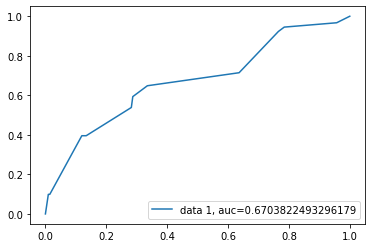

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test,  y_score)
auc = roc_auc_score(y_test, y_score)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Visualizing the Decision Tree using Graphviz

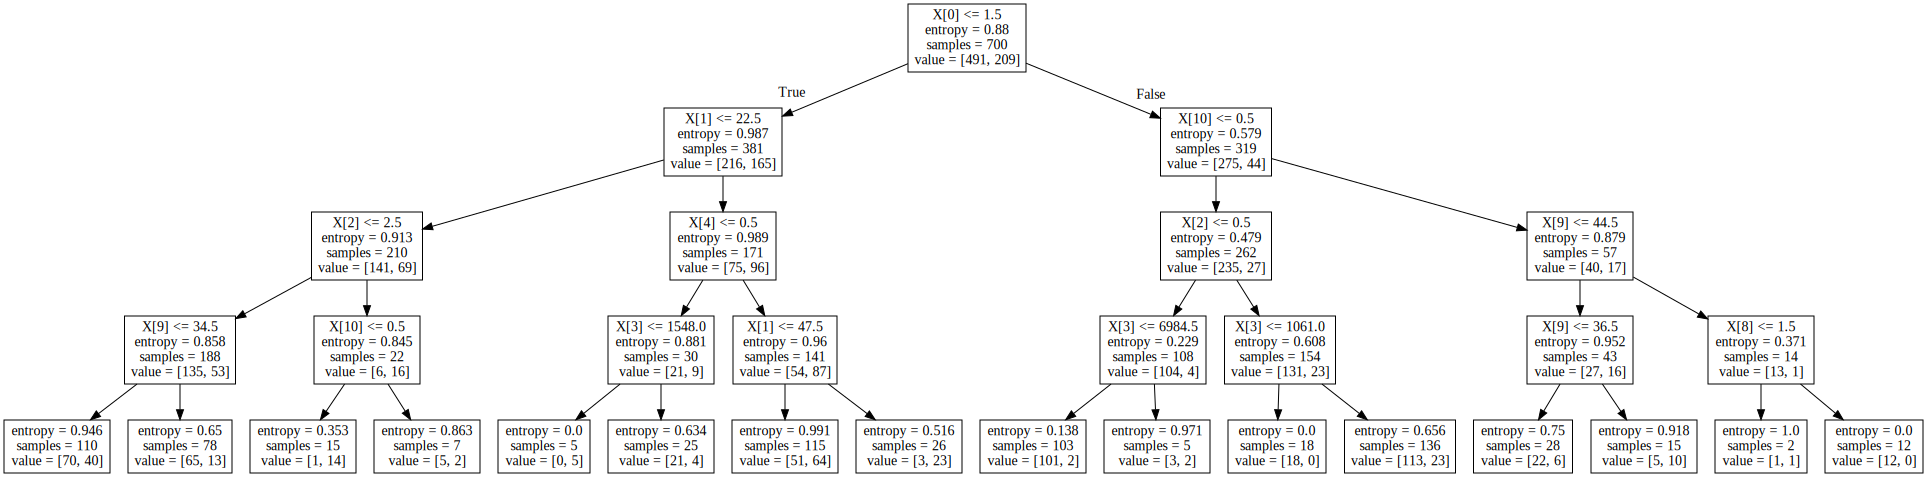

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(dc, out_file="tree.dot")

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Conclusion

## Some of the rules learnt
* X[0] became the root of the tree with entropy value 0.88
* X[1] became the right branch (TRUE) and X[10] became the left branch (FALSE)

* The Best Parameters of based on 10 fold CV and AUC ROC score was criterion: 'entropy' and max_depth: 4.0
* The decision tree with best params has accuracy score of **0.733** and roc_auc_score of **0.670**